In [1]:
#! conda install -c conda-forge pyarrow seaborn -n TORCH_ENV_NAME

import os
import sys
sys.path.append('lib')
import pandas as pd

import utils
from pre_process import pre_process

# Default variables

In [2]:
#* Define the format of preprocessed dta
FORMAT = 'parquet'
COMPRESSION = 'snappy'
PRECISON='32'


In [3]:
#* Get stocks list available
file_path_list = [file.path for file in os.scandir('data') if file.is_file()]
stocks_list = [file_path[file_path.find("/")+1:file_path.find("_")] for file_path in file_path_list]
STOCKS_LIST = sorted(set(stocks_list) - set(['all']))


# Process for single data

## Read and check the data

In [4]:
STOCKS = "GOOGL"
if STOCKS not in STOCKS_LIST:
    raise Exception("Given stocks col_name is not valid")
data = pre_process(STOCKS)
print(data.dtypes())
data.head()

Open      float32
High      float32
Low       float32
Close     float32
Volume      int32
Name       object
dtype: object


,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.470001,218.050003,209.320007,217.830002,13137450,GOOGL
2006-01-04,222.169998,224.699997,220.089996,222.839996,15292353,GOOGL
2006-01-05,223.220001,226.000000,220.970001,225.850006,10815661,GOOGL
2006-01-06,228.660004,235.490005,226.850006,233.059998,17759521,GOOGL
2006-01-09,233.440002,236.940002,230.699997,233.679993,12795837,GOOGL


## Drop 'Name' column and Check missing value

In [5]:
data.drop_column(['Name'])
_ = data.check_missing_value(verbose=True)


Total number of missing data in GOOGL: 0


##  Plot data

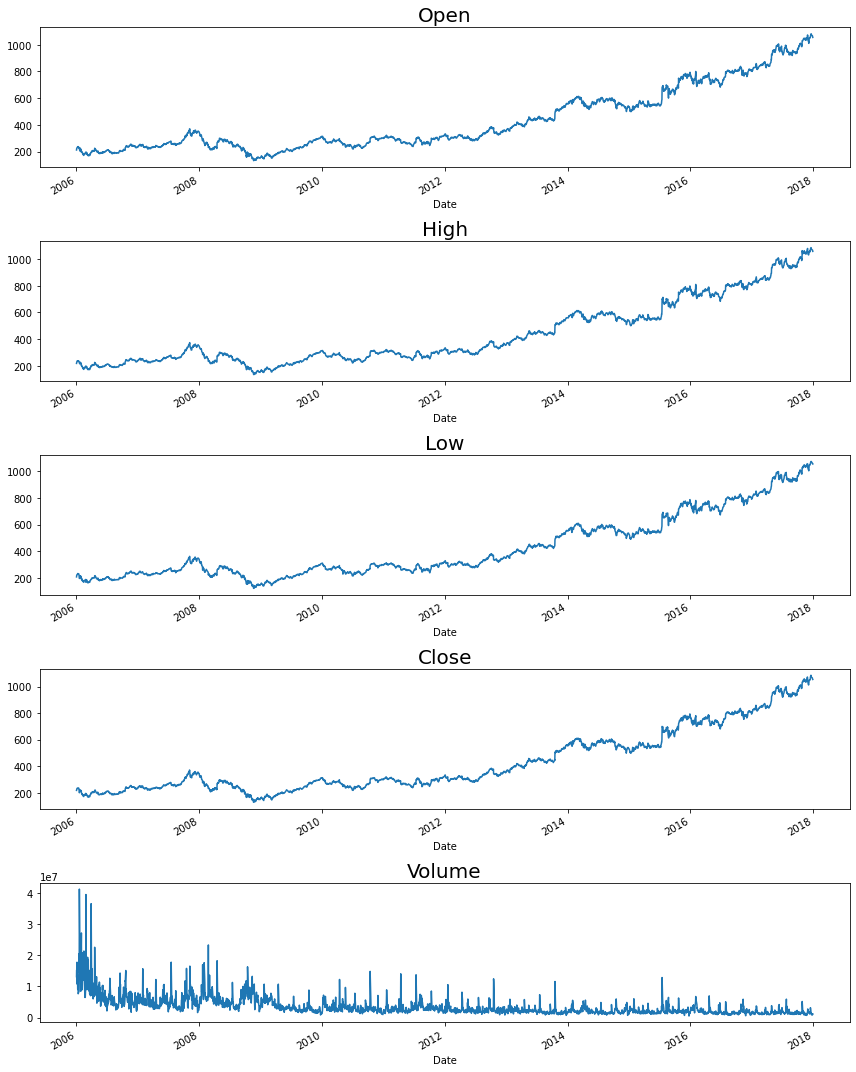

In [6]:
data.plot()

## Check correlation between columns

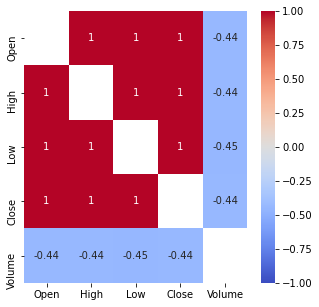

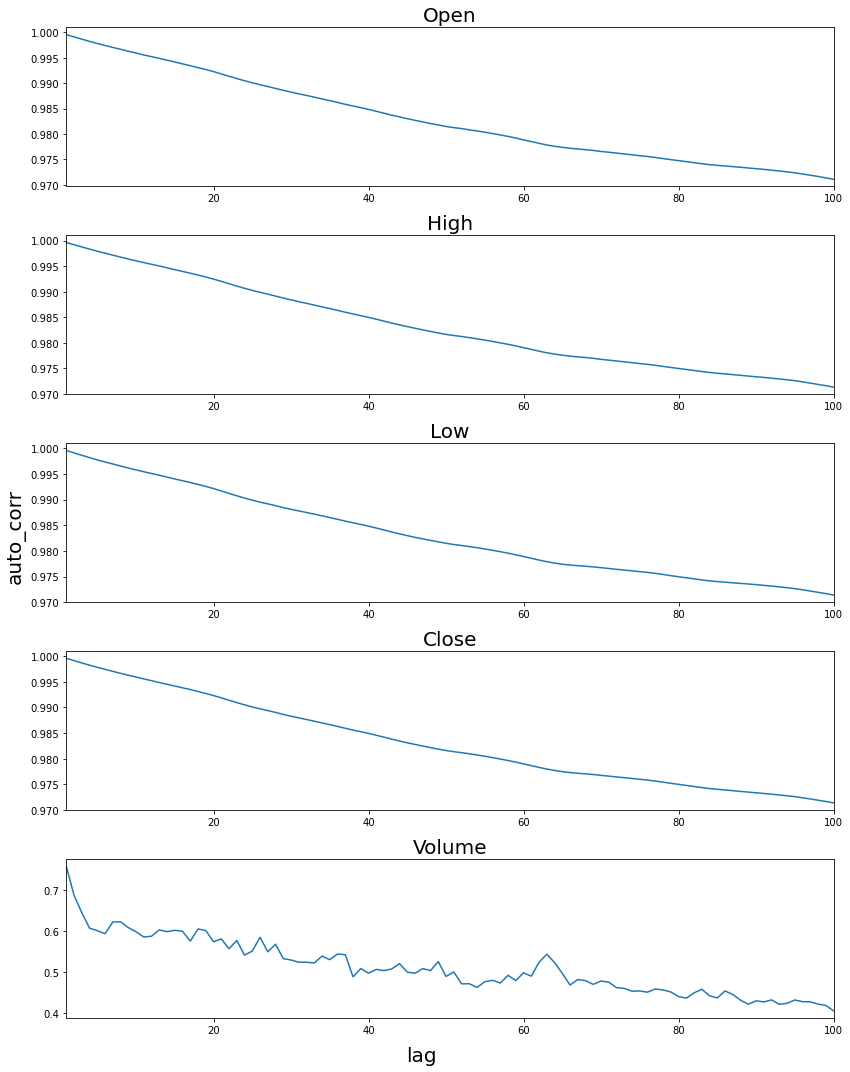

In [7]:
data.show_corr()
data.show_auto_corr()


In [7]:
#* Drop 'Volume' column since it has less correlation with othere data / itself
data.drop_column(['Volume'])


## Fill up missing value with average of same date

In [8]:
data.fill_missing_value()
_ = data.check_missing_value()  #* Re-check missing values

Total number of missing data in IBM: 0


## Save/Load processed data

In [9]:
data.save(fmt=FORMAT, comp=COMPRESSION, verbose=True)

Saved data: data/pre_32/IBM.parquet.snappy


In [11]:
"""
    Data saved with parquet already has dtype, parsing, ...
    Only needs to read them
"""
df = pd.read_parquet(os.path.join("data", "pre_" + PRECISON, utils.pre_processed_name(STOCKS)))
print(df.dtypes)
df.head()


Open     float32
High     float32
Low      float32
Close    float32
dtype: object


,Open,High,Low,Close
Date,,,,
2006-01-03,82.449997,82.550003,80.809998,82.059998
2006-01-04,82.199997,82.500000,81.330002,81.949997
2006-01-05,81.400002,82.900002,81.000000,82.500000
2006-01-06,83.949997,85.029999,83.410004,84.949997
2006-01-09,84.099998,84.250000,83.379997,83.730003


# Process for every stock data available

In [3]:
for stocks in STOCKS_LIST:
    data = pre_process(stocks)
    data.drop_column(['Volume', 'Name'])

    if data.check_missing_value():
        data.fill_missing_value()
        data.check_missing_value()  #* Re-check the data
    data.save(fmt=FORMAT, comp=COMPRESSION, verbose=True)
    print("-------------------------------------------------")


Total number of missing data in AABA: 0
Saved data: data/pre_32/AABA.parquet.snappy
-------------------------------------------------
Total number of missing data in AAPL: 0
Saved data: data/pre_32/AAPL.parquet.snappy
-------------------------------------------------
Total number of missing data in AMZN: 0
Saved data: data/pre_32/AMZN.parquet.snappy
-------------------------------------------------
Total number of missing data in AXP: 2
2017-07-31: Open, Low
Total number of missing data in AXP: 0
Saved data: data/pre_32/AXP.parquet.snappy
-------------------------------------------------
Total number of missing data in BA: 3
2017-07-31: Open, High, Low
Total number of missing data in BA: 0
Saved data: data/pre_32/BA.parquet.snappy
-------------------------------------------------
Total number of missing data in CAT: 3
2017-07-31: Open, High, Low
Total number of missing data in CAT: 0
Saved data: data/pre_32/CAT.parquet.snappy
-------------------------------------------------
Total numb